# 言語処理100本ノック 2020 (Rev 2)


## 第4章: 形態素解析

In [2]:
!head nlp100.github.io/data/neko.txt


In [3]:
#!mecab -d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd nlp100.github.io/data/neko.txt >neko.txt.mecab
!mecab nlp100.github.io/data/neko.txt >neko.txt.mecab

In [4]:
!head neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ


### 30. 形態素解析結果の読み込み

In [5]:
# https://taku910.github.io/mecab/
# https://analytics-note.xyz/programming/mecab-default-format/
# 表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音

import re
lines = []
sno = 0
with open('neko.txt.mecab') as f:
  for i,line in enumerate(f):
#    if i > 20:
#      break
    if re.search(r"^EOS$",line):
      sno += 1
      continue
    if re.search(r"^$",line):
      continue
    s = line.split('\t')
    if re.search(r"^$",s[0]):
      continue
    t = s[1].split(',')
    lines.append({
      "sno": sno,
      "surface": s[0],
      "base": t[6],
      "pos": t[0],
      "pos1": t[1],
    })

lines[0:10]


[{'sno': 0, 'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'},
 {'sno': 2, 'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
 {'sno': 2, 'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'},
 {'sno': 2, 'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
 {'sno': 2, 'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'},
 {'sno': 2, 'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'},
 {'sno': 2, 'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'},
 {'sno': 2, 'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'},
 {'sno': 3, 'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'},
 {'sno': 3, 'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}]


### 31. 動詞

In [6]:
{l["surface"] for l in lines if l["pos"] == "動詞"}

{'貫く',
 'こすり',
 '届く',
 '疲れる',
 'のぼる',
 'よそ',
 '持た',
 '光らし',
 '踊り',
 '恐れ入っ',
 '鳴',
 '及ぼす',
 '評する',
 '動く',
 '控える',
 '聞く',
 'ざれ',
 '数え',
 '死な',
 '進める',
 '吹く',
 '忌む',
 '下がれ',
 '廻す',
 '釣り込ま',
 '擲つ',
 '填め',
 'すまし',
 'いただか',
 '出せ',
 '縛せ',
 '驚か',
 'おっ',
 'とら',
 '惚れ',
 'かる',
 '掠め',
 '切り抜ける',
 '逆らわ',
 '下がる',
 '因っ',
 '這入',
 '焦がれ',
 '投げ込ん',
 '読み',
 '恋い',
 '通り',
 '動じ',
 '恐れ',
 '踞る',
 'ねばり',
 '平伏し',
 '要する',
 '刈り',
 'よそう',
 'なさる',
 '誘わ',
 '追っかけ',
 'かれ',
 '明け',
 '償お',
 '登る',
 'ぬう',
 '行こ',
 'こし',
 '響い',
 '崇め',
 '働か',
 '過ぎん',
 'くらむ',
 '分れ',
 '考え直し',
 '通り抜けよ',
 'むけ',
 '破れ',
 '見舞う',
 'あら',
 'しごき',
 '仕ろ',
 '漂う',
 '起こそ',
 'いやがれ',
 '伝え',
 '捲か',
 '申し聞け',
 '執っ',
 '打た',
 '載せる',
 '聞き糺し',
 '起そ',
 '跳ね返る',
 'ちまい',
 '律すれ',
 '魂消る',
 '添える',
 '焚い',
 '揚げる',
 '握ろ',
 '敷か',
 '呑む',
 'かおっ',
 'よごれる',
 '潰れ',
 'あきらめ',
 '濁っ',
 '欠け',
 '有っ',
 '磨り潰し',
 '臭え',
 '入り込ん',
 '勝つ',
 '着せる',
 'おっしゃろ',
 '朽ち',
 '認め',
 '飾る',
 '究め',
 '堪え',
 '考え付い',
 '敲い',
 '聞き',
 '着こなし',
 'ねだん',
 '煎じ',
 '反っ',
 '合わ',
 '置こ',
 '払う',
 '捨てる',
 '窘め',
 'すり抜け',
 'あてがえ',


### 32. 動詞の基本形

In [7]:
{l["base"] for l in lines if l["pos"] == "動詞"}

{'つくろう',
 '貫く',
 '届く',
 'あつめる',
 '疲れる',
 'のぼる',
 '及ぼす',
 '明け放つ',
 '評する',
 '動く',
 'とろける',
 '控える',
 '聞く',
 '進める',
 '見積る',
 '吹く',
 '忌む',
 '映る',
 '廻す',
 '生き延びる',
 '描き出す',
 '見上ぐ',
 '擲つ',
 'やける',
 '縺れる',
 '決す',
 '比す',
 'かる',
 'つけ加える',
 '切り抜ける',
 '廻れる',
 '下がる',
 'いつわる',
 '踞る',
 '寝つく',
 '要する',
 '脱す',
 'よそう',
 'なさる',
 'からまる',
 '敬う',
 '登る',
 'ぬう',
 '投げる',
 '取り合う',
 'くらむ',
 '寝過ごす',
 '惚れ込む',
 '奮う',
 '凹む',
 '見舞う',
 '飛び込める',
 '漂う',
 '抱え込む',
 '載せる',
 'はらう',
 '装う',
 '跳ね返る',
 '魂消る',
 '添える',
 'もうす',
 '揚げる',
 '似る',
 '来す',
 '枯れる',
 'はぐる',
 '呑む',
 'よごれる',
 '祭る',
 '転がす',
 '追付く',
 '眠れる',
 'やむを得る',
 '載っける',
 '勝つ',
 '着せる',
 '飾る',
 '引掻く',
 '焦がれる',
 '転じる',
 'ほかなる',
 '聞き糺す',
 '踏みつける',
 '払う',
 'あてる',
 '捨てる',
 '急き込む',
 '尽きる',
 '融ける',
 '依る',
 '知れ渡る',
 '話せる',
 '失する',
 '集る',
 '張り切れる',
 '合う',
 '形づくる',
 '誘う',
 '掛ける',
 '教わる',
 'みる',
 '叩く',
 '亡ぼす',
 '起きる',
 '剥がれる',
 '制す',
 'うく',
 '利く',
 '聞き分ける',
 '釣り合う',
 '極まる',
 '引っ繰り返す',
 '頼む',
 'おどかす',
 'あつかう',
 '思い付く',
 'よむ',
 '積み込む',
 '放す',
 '侵す',
 '引きずり出す',
 'かねる',
 '拭く',
 'らっしゃる',



### 33. 「AのB」

In [8]:
anob = set()
for i,l in enumerate(lines):
  if l["surface"] != "の":
    continue
  if i < 1:
    continue
  A = lines[i-1]
  B = lines[i+1]
  if A["pos"] != "名詞" or B["pos"] != "名詞":
    continue
  anob.add("{}{}{}({}-{}-{})".format(A["surface"],l["surface"],B["surface"],A["pos"],l["pos"],B["pos"]))
anob

{'主人の羽織(名詞-助詞-名詞)',
 '垣の功(名詞-助詞-名詞)',
 '句の価値(名詞-助詞-名詞)',
 '屋の天秤棒(名詞-助詞-名詞)',
 '法外の胴間声(名詞-助詞-名詞)',
 '一身上の用事(名詞-助詞-名詞)',
 '金田の倉(名詞-助詞-名詞)',
 '君の羽根(名詞-助詞-名詞)',
 '残念の至(名詞-助詞-名詞)',
 '鼻の持主(名詞-助詞-名詞)',
 '灰色の毛(名詞-助詞-名詞)',
 '山の芋の箱(名詞-助詞-名詞)',
 '泥の中(名詞-助詞-名詞)',
 '製作の上(名詞-助詞-名詞)',
 '日本の猫(名詞-助詞-名詞)',
 '人の尊敬(名詞-助詞-名詞)',
 'どこの会(名詞-助詞-名詞)',
 '寒月の所(名詞-助詞-名詞)',
 '溜りの中(名詞-助詞-名詞)',
 '霊の気(名詞-助詞-名詞)',
 '鋲の頭(名詞-助詞-名詞)',
 'さんの頭(名詞-助詞-名詞)',
 '自己の思い(名詞-助詞-名詞)',
 '疋の怪物(名詞-助詞-名詞)',
 '元信の幅(名詞-助詞-名詞)',
 'カーライルの事(名詞-助詞-名詞)',
 '私のそば(名詞-助詞-名詞)',
 'グレーの金魚(名詞-助詞-名詞)',
 '蛙の眼球(名詞-助詞-名詞)',
 '何の択(名詞-助詞-名詞)',
 '前の商売(名詞-助詞-名詞)',
 '友達のうち(名詞-助詞-名詞)',
 '間の間隔(名詞-助詞-名詞)',
 'いろいろの悪もの(名詞-助詞-名詞)',
 '前歯の間(名詞-助詞-名詞)',
 '命令のうち(名詞-助詞-名詞)',
 '帝都の中心(名詞-助詞-名詞)',
 '付きの連中(名詞-助詞-名詞)',
 '店のもの(名詞-助詞-名詞)',
 '主人の心中(名詞-助詞-名詞)',
 '下の事件(名詞-助詞-名詞)',
 '結城紬の綿(名詞-助詞-名詞)',
 '本の足(名詞-助詞-名詞)',
 '世の中の人間(名詞-助詞-名詞)',
 '凶作の義捐(名詞-助詞-名詞)',
 '恐縮の至り(名詞-助詞-名詞)',
 '緑の黒髪(名詞-助詞-名詞)',
 '生徒の本性(名詞-助詞-名詞)',
 '場の横(名詞-助詞-名詞)',
 '酔っぱらいのよう(名詞-助詞-名詞)',
 '吸口の方(名詞-助詞-名詞)',
 '柳の虫(


### 34. 名詞の連接

In [9]:
#w = ""
w = []
r = set()
for (i,l) in enumerate(lines):
  if l["pos"] == "名詞":
#    w += l["surface"]
    w.append(l)
  else:
    if len(w) > 1:
      s = []
      p = []
      for w2 in w:
        s.append(w2["surface"])
        p.append(w2["pos"])
      r.add("{}({})".format("-".join(s),"-".join(p)))
    w = []
r

{'チー-ン(名詞-名詞)',
 '六-円(名詞-名詞)',
 '和-唐-内(名詞-名詞-名詞)',
 '出-かさん(名詞-名詞)',
 '十-五-番(名詞-名詞-名詞)',
 '浮華-虚栄(名詞-名詞)',
 '腹-加減(名詞-名詞)',
 '牡蠣-的-主人(名詞-名詞-名詞)',
 '独-仙-流(名詞-名詞-名詞)',
 '三-日-処置(名詞-名詞-名詞)',
 '征-露(名詞-名詞)',
 '金田-君-自身(名詞-名詞-名詞)',
 '昼飯-後(名詞-名詞)',
 '人-当時-有名(名詞-名詞-名詞)',
 '根本-的(名詞-名詞)',
 '男-の(名詞-名詞)',
 '大抵-一-隊(名詞-名詞-名詞)',
 '契約-履行(名詞-名詞)',
 '十-把-一(名詞-名詞-名詞)',
 '形式-論理-学(名詞-名詞-名詞)',
 '八つ-口(名詞-名詞)',
 'いや-日(名詞-名詞)',
 '千-字-文(名詞-名詞-名詞)',
 '二-十-七(名詞-名詞-名詞)',
 '円滑-円滑(名詞-名詞)',
 '全体-人(名詞-名詞)',
 '——-両君(名詞-名詞)',
 '一意-戦闘(名詞-名詞)',
 '裸体-画(名詞-名詞)',
 '己-惚(名詞-名詞)',
 '万古-不磨(名詞-名詞)',
 '四-五-尺(名詞-名詞-名詞)',
 '原理-原則(名詞-名詞)',
 '種-属(名詞-名詞)',
 'それ-ぎりかい(名詞-名詞)',
 'ただ-人(名詞-名詞)',
 '四-十-六-目(名詞-名詞-名詞-名詞)',
 'うた-事蹟(名詞-名詞)',
 '屑-籠(名詞-名詞)',
 '一-冊(名詞-名詞)',
 '二-三(名詞-名詞)',
 '三-度-馳(名詞-名詞-名詞)',
 '全体-不埒(名詞-名詞)',
 'それ-ぎり-音(名詞-名詞-名詞)',
 'せんだって-学校(名詞-名詞)',
 '家-根(名詞-名詞)',
 '十-二-個(名詞-名詞-名詞)',
 '吐出-致候(名詞-名詞)',
 '福地-さん(名詞-名詞)',
 '雌-猫-雄-猫(名詞-名詞-名詞-名詞)',
 '坊-ば-ちゃん(名詞-名詞-名詞)',
 '時事-問題(名詞-名詞)',
 '護身-服(名詞-名詞)',
 '齎-ら(名詞-名詞)',
 '蒟蒻-問答-的(名詞-名詞-名詞)',
 'なあ


### 35. 単語の出現頻度

In [10]:
import collections
words = [ l["surface"] for l in lines ]
#counts = {}

print(len(words))

c = collections.Counter(words).most_common()

c


206338


[('の', 9194),
 ('。', 7486),
 ('て', 6868),
 ('、', 6772),
 ('は', 6420),
 ('に', 6243),
 ('を', 6071),
 ('と', 5508),
 ('が', 5337),
 ('た', 3988),
 ('で', 3806),
 ('「', 3231),
 ('」', 3225),
 ('も', 2479),
 ('ない', 2390),
 ('だ', 2363),
 ('し', 2322),
 ('から', 2032),
 ('ある', 1728),
 ('な', 1613),
 ('ん', 1568),
 ('か', 1530),
 ('いる', 1249),
 ('事', 1207),
 ('へ', 1034),
 ('う', 992),
 ('する', 992),
 ('もの', 981),
 ('君', 973),
 ('です', 973),
 ('云う', 937),
 ('主人', 932),
 ('よう', 696),
 ('ね', 683),
 ('この', 649),
 ('御', 636),
 ('ば', 617),
 ('人', 602),
 ('その', 576),
 ('一', 554),
 ('そう', 546),
 ('何', 539),
 ('なる', 531),
 ('さ', 514),
 ('よ', 509),
 ('なら', 483),
 ('吾輩', 481),
 ('い', 478),
 ('ます', 458),
 ('じゃ', 448),
 ('…', 433),
 ('これ', 414),
 ('\u3000', 411),
 ('なっ', 404),
 ('それ', 381),
 ('来', 364),
 ('れ', 356),
 ('見', 350),
 ('でも', 346),
 ('時', 345),
 ('迷亭', 343),
 ('ませ', 330),
 ('いい', 320),
 ('三', 319),
 ('——', 319),
 ('まで', 313),
 ('ところ', 313),
 ('方', 312),
 ('二', 303),
 ('ず', 299),
 ('上', 294),
 ('まし', 289),
 ('寒


### 36. 頻度上位10語

Duplicate key in file PosixPath('/home/masaru/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 250 ('font.family:  Noto Sans CJK JP')


['の', '。', 'て', '、', 'は', 'に', 'を', 'と', 'が', 'た']
[9194, 7486, 6868, 6772, 6420, 6243, 6071, 5508, 5337, 3988]


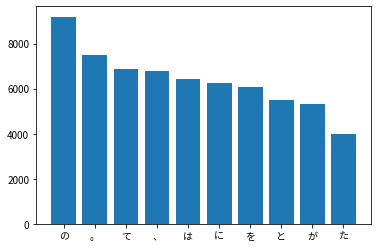

In [11]:
import matplotlib.pyplot as plt

top = c[0:10]
x = [t[0] for t in top]
y = [t[1] for t in top]
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.bar( x, y, align="center")
plt.xticks(ticks=range(0,len(x)),labels=x)
print(x)
print(y)



### 37. 「猫」と共起頻度の高い上位10語

[('の', 9194), ('。', 7486), ('て', 6868), ('、', 6772), ('は', 6420), ('に', 6243), ('を', 6071), ('と', 5508), ('が', 5337), ('た', 3988)]


<BarContainer object of 10 artists>

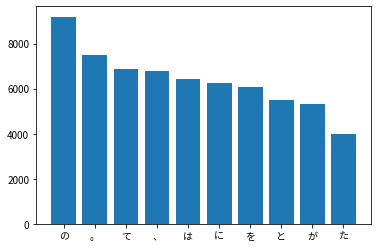

In [12]:
snos = { l["sno"] for l in lines if l["surface"]=="猫"}
len(snos)

words = []
for sno in snos:
  words += [l["surface"] for l in lines if l["sno"]==sno and l["surface"] != "猫"]
#for l in lines:

cat = collections.Counter(words).most_common()
cattop = c[0:10]
print(cattop)

x = [t[0] for t in cattop]
y = [t[1] for t in cattop]
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.bar( x, y, align="center")



### 38. ヒストグラム


(array([1.3474e+04, 5.5000e+01, 1.5000e+01, 8.0000e+00, 0.0000e+00,
        8.0000e+00, 2.0000e+00, 0.0000e+00, 3.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.00000e+00, 1.84860e+02, 3.68720e+02, 5.52580e+02, 7.36440e+02,
        9.20300e+02, 1.10416e+03, 1.28802e+03, 1.47188e+03, 1.65574e+03,
        1.83960e+03, 2.02346e+03, 2.20732e+03, 2.39118e+03, 2.57504e+03,
        2.75890e+03, 2.94276e+03, 3.12662e+03, 3.31048e+03, 3.49434e+03,
        3.67820e+03, 3.862

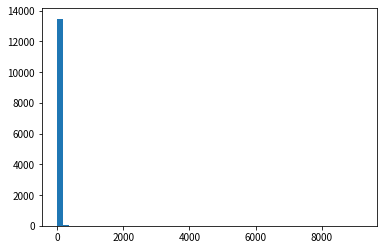

In [36]:
v = [ cc[1] for cc in c]
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist(v,bins=50)



## 39. Zipfの法則


       freq   rank
13583     1  10488
9448      1  10488
9449      1  10488
9450      1  10488
9451      1  10488
...     ...    ...
4      6420      5
3      6772      4
2      6868      3
1      7486      2
0      9194      1

[13584 rows x 2 columns]


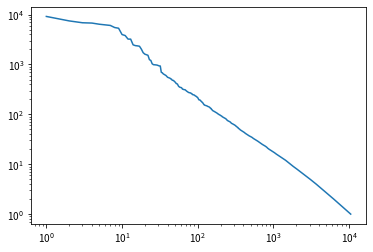

In [57]:
import pandas as pd


df = pd.DataFrame(v,columns={"freq"})
df = df.sort_values("freq")

df["rank"] = df["freq"].rank(ascending=False).astype('int')

print(df)

fig = plt.figure()
fig.patch.set_facecolor('white')
plt.xscale('log')
plt.yscale('log')
plt.plot(df["rank"],df["freq"])

